In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC

In [2]:
raw_data = pd.read_csv("Data_Pre-processing\\Phishing_dataset_03.csv")
raw_data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [3]:
print(len(raw_data.index))

58645


### List all column names

In [4]:
for column in raw_data.columns:
    print(column)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_slash_url
qty_questionmark_url
qty_equal_url
qty_at_url
qty_and_url
qty_exclamation_url
qty_space_url
qty_tilde_url
qty_comma_url
qty_plus_url
qty_asterisk_url
qty_hashtag_url
qty_dollar_url
qty_percent_url
qty_tld_url
length_url
qty_dot_domain
qty_hyphen_domain
qty_underline_domain
qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_at_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain
qty_vowels_domain
domain_length
domain_in_ip
server_client_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
qty_slash_directory
qty_questionmark_directory
qty_equal_directory
qty_at_directory
qty_and_directory
qty_exclamation_directory
qty_space_directory
qty_tilde_directory
qty_comma_directory
qty_plus_directory
qty_asterisk_directory
qty_hashtag_directory
qty_dollar_directory
qty_percent_

# Clean Data

In [5]:
clean_data = raw_data.dropna()
print(len(clean_data.index))

58645


Note how the number of rows has not changed, this is certainly one complete dataset, whoop!

In [7]:
y = clean_data.phishing
feature_columns = ["qty_dot_url","qty_hyphen_url","qty_questionmark_url","qty_and_url","length_url",
                   "domain_length","qty_dot_directory","directory_length","file_length","qty_params","url_shortened"]
X = clean_data[feature_columns]
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)

In [8]:
model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
model.fit(train_X, train_y)

NuSVC(kernel='linear', shrinking=False)

In [9]:
val_predictions = model.predict(val_X)
print(val_predictions)
print(val_y.head())

[1 1 0 ... 1 0 0]
57908    1
12376    1
30126    0
52039    0
12618    0
Name: phishing, dtype: int64


In [10]:
from sklearn.metrics import mean_absolute_error

In [11]:
val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

0.2009957713818033


I think the MAE in this context represents the percentage chance the model will be wrong, as the target is a boolean. Let's try reducing the amount of features, and see how this affects the MAE

In [12]:
feature_columns = ["qty_dot_url","length_url",
                   "domain_length","qty_dot_directory","directory_length","file_length","qty_params","url_shortened"]
X = clean_data[feature_columns]
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_y, val_predictions)
print(val_mae)

0.2009957713818033


In [13]:
def get_mae(X, y, model):
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    model.fit(train_X, train_y)
    print("Making Predictions...")
    val_predictions = model.predict(val_X)
    print("Calculating MAE...")
    val_mae = mean_absolute_error(val_y, val_predictions)
    print(val_mae)

Hmm, it seemed to have no effect? Lets try calculating the MAE when all columns are used as feature columns? I also created a function to calculate the MAE.

In [14]:
feature_for_columns = []
for column in clean_data.columns:
    feature_for_columns.append(column)
X=clean_data[feature_for_columns]
model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
#get_mae(X,y,model)

In [15]:
feature_columns = ["qty_dot_url","qty_hyphen_url","qty_questionmark_url","qty_and_url","length_url",
                   "domain_length","qty_dot_directory","directory_length","file_length","qty_params","url_shortened"]
for feature in feature_columns:
    X=clean_data[feature_columns]
    model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
    get_mae(X,y,model)
    feature_columns.remove(feature)
    print("Feature Removed: " + feature)

Training Model...
Making Predictions...
Calculating MAE...
0.2009957713818033
Feature Removed: qty_dot_url
Training Model...
Making Predictions...
Calculating MAE...
0.20147319601691446
Feature Removed: qty_questionmark_url
Training Model...
Making Predictions...
Calculating MAE...
0.20147319601691446
Feature Removed: length_url
Training Model...
Making Predictions...
Calculating MAE...
0.20358750511526394
Feature Removed: qty_dot_directory
Training Model...
Making Predictions...
Calculating MAE...
0.20413313326967672
Feature Removed: file_length
Training Model...
Making Predictions...
Calculating MAE...
0.2039967262310735
Feature Removed: url_shortened


In [16]:
feature_columns = ["length_url",
                   "directory_length","qty_params"]
for feature in feature_columns:
    X=clean_data[feature_columns]
    model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
    get_mae(X,y,model)
    feature_columns.remove(feature)
    print("Feature Removed: " + feature)

Training Model...
Making Predictions...
Calculating MAE...
0.19963170099577138
Feature Removed: length_url
Training Model...
Making Predictions...
Calculating MAE...
0.2042013367889783
Feature Removed: qty_params


In [15]:
#pickle.dump(model, open("url_model.pkl","wb"))

In [17]:
feature_columns = ["qty_dot_url"]
feature_columns_long = ["qty_hyphen_url","qty_questionmark_url","qty_and_url","length_url",
                   "domain_length","qty_dot_directory","directory_length","file_length","qty_params","url_shortened"]
for feature in feature_columns_long:
    X=clean_data[feature_columns]
    model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
    get_mae(X,y,model)
    feature_columns.append(feature_columns_long[0])
    feature_columns_long.pop(0)
    print("Feature Added: " + feature)

Training Model...
Making Predictions...
Calculating MAE...
0.47578775064793344
Feature Added: qty_hyphen_url
Training Model...
Making Predictions...
Calculating MAE...
0.5079798117582868
Feature Added: qty_and_url
Training Model...
Making Predictions...
Calculating MAE...
0.4335697722002455
Feature Added: domain_length
Training Model...
Making Predictions...
Calculating MAE...
0.47578775064793344
Feature Added: directory_length
Training Model...
Making Predictions...
Calculating MAE...
0.19854044468694584
Feature Added: qty_params


In [21]:
feature_columns = ["length_url","qty_params"]

These 3 features are all that is needed to train a model with a MAE of under 20% !
These are the features I'll be focusing on.

In [28]:
new_df_columns = ["length_url",
                   "directory_length","qty_params", "phishing"]
new_df = raw_data[new_df_columns]
new_df.head(50)

,length_url,directory_length,qty_params,phishing
0,14,-1,-1,0
1,38,6,-1,0
2,24,1,-1,0
3,38,13,-1,1
4,46,27,-1,1
5,45,28,-1,1
6,32,18,-1,1
7,29,-1,-1,0
8,18,6,-1,1
9,11,1,-1,0


In [29]:
feature_columns = ["length_url","qty_params"]
X=clean_data[feature_columns]
y = clean_data.phishing
model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
get_mae(X,y,model)

Training Model...
Making Predictions...
Calculating MAE...
0.19519847224116765


Its even more accurate if we remove the length of the directory feature.
So the web app needs to:
- Parse the url
- Identify the URL length
- Identify the quantity of parameters
- Plug those features into the model, hosted on a Flask app

In [6]:
feature_columns = ["length_url","qty_params"]
X=clean_data[feature_columns]
y = clean_data.phishing
model = NuSVC(kernel = 'linear',gamma = 'scale', shrinking = False)
#model.fit(X,y)
#pickle.dump(model, open("url_model.pkl","wb"))

In [10]:
from sklearn.metrics import precision_score
def get_precision(X, y, model):
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    model.fit(train_X, train_y)
    print("Making Predictions...")
    val_predictions = model.predict(val_X)
    print("Calculating precision...")
    val_mae = precision_score(val_y, val_predictions)
    print(val_mae)

In [11]:
get_precision(X,y,model)

Training Model...
Making Predictions...
Calculating precision...
0.8318657127132636


In [12]:
clean_data.shape

(58645, 112)

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib
def get_matrix(X, y, model):
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    model.fit(train_X, train_y)
    print("Making Predictions...")
    val_predictions = model.predict(val_X)
    print("Calculating matrix...")
    val_mae = ConfusionMatrixDisplay.from_predictions(val_y, val_predictions)
    print(val_mae)

Training Model...
Making Predictions...
Calculating matrix...


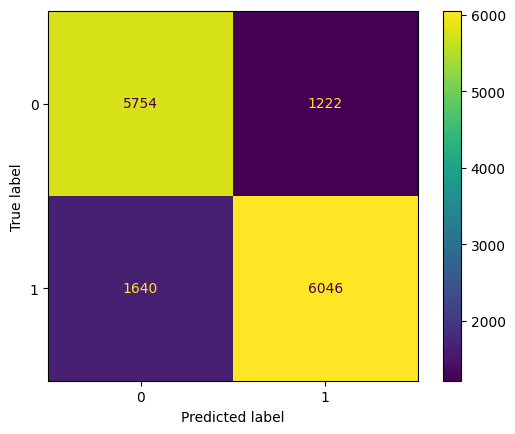

In [23]:
get_matrix(X,y,model)

Training Model...
Making Predictions...


c:\Users\peter\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NuSVC was fitted with feature names
  warnings.warn(


Calculating matrix...


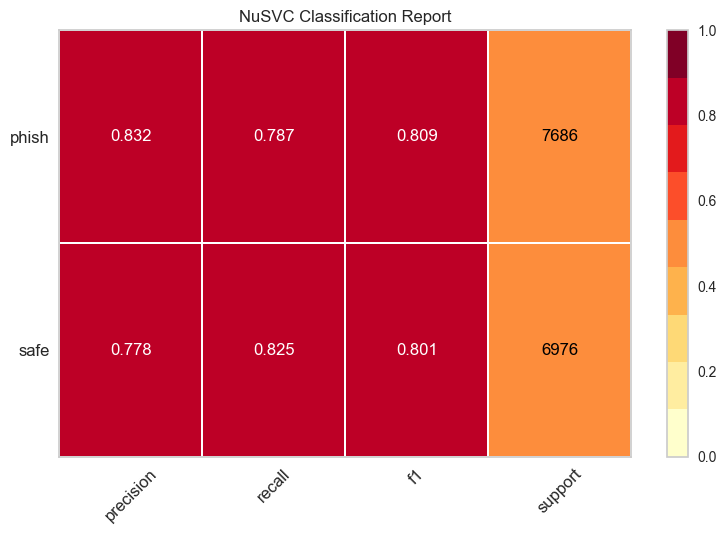

In [28]:
from yellowbrick.classifier import ClassificationReport
def get_matrix_adv(X, y, model):
    
    classes = ["safe","phish"]
    visualizer = ClassificationReport(
        model, classes=classes, support=True)
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    visualizer.fit(train_X, train_y)
    print("Making Predictions...")
    visualizer.score(val_X,val_y)
    print("Calculating matrix...")
    visualizer.show()
    
get_matrix_adv(X,y,model)

In [16]:
from sklearn.metrics import classification_report
def get_report(X, y, model):
    train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)
    print("Training Model...")
    model.fit(train_X, train_y)
    print("Making Predictions...")
    val_predictions = model.predict(val_X)
    print("Calculating report")
    val_mae = classification_report(val_y, val_predictions)
    print(val_mae)
get_report(X,y,model)

Training Model...
Making Predictions...
Calculating report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      6976
           1       0.83      0.79      0.81      7686

    accuracy                           0.80     14662
   macro avg       0.81      0.81      0.80     14662
weighted avg       0.81      0.80      0.80     14662

